In [14]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from astropy.constants import h, m_e, k_B
from astropy.constants import u as atomicu

In [6]:
k_B

<<class 'astropy.constants.codata2018.CODATA2018'> name='Boltzmann constant' value=1.380649e-23 uncertainty=0.0 unit='J / K' reference='CODATA 2018'>

In [7]:
def saha(T,Z_i,Z_ii,E_ionize,P_e):
  ''' Calculate ratio of ionization states for gas of arbitrary composition.
  Inputs:
    T (float): temperature of the gas in K
    Z_i (float): Weighted sum of # of ways the atom can arrange its electrons in ionization state i
    Z_ii (float): Weighted sum of # of ways the atom can arrange its electrons in ionization state i+1
    E_ionize (float):Energy needed to remove electron from ground state in ionization state i in eV
    n_e (float): Number density in electrons in cm^-3

  Outputs:
    Nii_to_Ni (float): Ratio of # of atoms in ionization state i+1 to that of i
  '''

  T = T * u.K
  E_ionize = E_ionize * u.eV
  P_e = P_e * (u.N) * (u.m)**-2

  Nii_to_Ni = 2*k_B*T*Z_ii/(P_e*Z_i)*(2*np.pi*m_e*k_B*T/h**2)**(3/2)*np.exp(-E_ionize/(k_B*T))
  Nii_to_Ni = Nii_to_Ni.decompose()
  return(Nii_to_Ni)

In [37]:
def saha2(T,Z_i,Z_ii,E_ionize,n_e):
  ''' Calculate ratio of ionization states for gas of arbitrary composition.
  Inputs:
    T (float): temperature of the gas in K
    Z_i (float): Weighted sum of # of ways the atom can arrange its electrons in ionization state i
    Z_ii (float): Weighted sum of # of ways the atom can arrange its electrons in ionization state i+1
    E_ionize (float):Energy needed to remove electron from ground state in ionization state i in eV
    n_e (float): Number density in electrons in cm^-3

  Outputs:
    Nii_to_Ni (float): Ratio of # of atoms in ionization state i+1 to that of i
  '''

  T = T * u.K
  E_ionize = E_ionize * u.eV
  n_e = n_e * (u.m)**-3

  Nii_to_Ni = 2*Z_ii/(n_e*Z_i)*(2*np.pi*m_e*k_B*T/h**2)**(3/2)*np.exp(-E_ionize/(k_B*T))
  Nii_to_Ni = Nii_to_Ni.decompose()
  return(Nii_to_Ni)

In [4]:
def partition_H(T, n=3):
  ''' Calculate partition function for neutral hydrogen.
  Inputs:
    T (float or float array): temperature of the gas in K
    n (int): number of energy states to consider (default: n=3)

  Outputs:
    z (float or float array): partition function for input values of T
  '''

  if np.isscalar(T):
    E = -13.6*u.eV / np.power(np.arange(1,n+1),2)
    g = 2*np.arange(1,n+1)**2
    weights = g*np.exp(-(E-E[0])/(k_B * T*u.K))
    z = np.sum(weights)

  else:
    z = np.zeros_like(T)

    for i, temp in enumerate(T):
      E = -13.6*u.eV / np.power(np.arange(1,n+1),2)
      g = 2*np.arange(1,n+1)**2
      weights = g*np.exp(-(E-E[0])/(k_B * temp*u.K))
      z[i] = np.sum(weights)

  return z

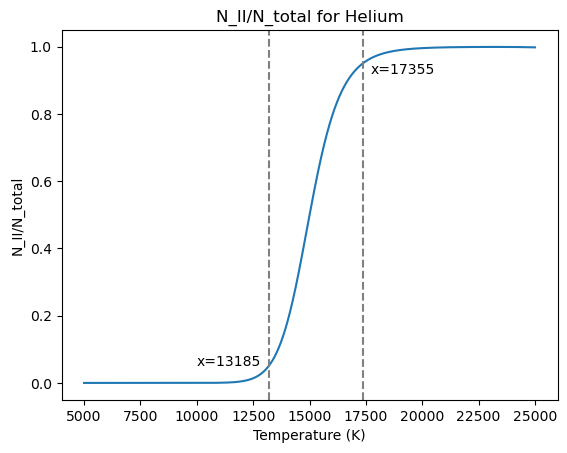

In [36]:
# your code here

temp = np.arange(5000, 25000, 1)
y = ((saha(temp,1,2,24.6,20))**(-1) + (saha(temp,2,1,54.4,20)) + 1)**(-1)
plt.plot(temp, y)
plt.title("N_II/N_total for Helium")
plt.ylabel("N_II/N_total")
plt.xlabel("Temperature (K)")
plt.axvline(x=np.interp(0.05, y, temp), linestyle="dashed", color="gray")
plt.axvline(x=np.interp(0.95, y, temp), linestyle="dashed", color="gray")
plt.text(10000, 0.05, "x="+str(int(round(np.interp(0.05, y, temp), 0))))
plt.text(17700, 0.92, "x="+str(int(round(np.interp(0.95, y, temp), 0))))
plt.show()

In [31]:
saha(25000, 1, 2, 24.6, 20)

<Quantity 7239.05201758>

In [13]:
saha(25000, 2, 1, 54.4, 20)

<Quantity 0.00177912>

In [46]:
N = saha2(15700000, 2, 1, 13.6, 6.1*10**31)
N/(1+N)

<Quantity 0.70912391>

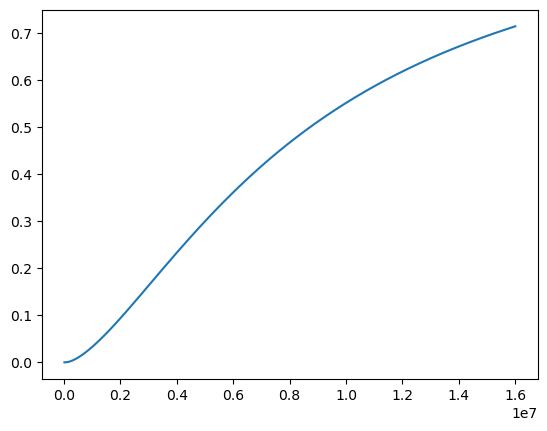

In [42]:
temp = np.arange(15000, 16000000, 100)
N = saha2(temp, 2, 1, 13.6, 6.1*10**31)
y=N/(1+N)

plt.plot(temp, y)
plt.show()

In [45]:
(20*u.N*(u.m**-2)/(k_B*1.5*10**7*u.K)).decompose()

<Quantity 9.65729402e+16 1 / m3>

In [47]:
saha(5777, 2.30, 1, 11.9, 1.5)

<Quantity 0.00203708>